Fine-Tuned MobileNets <br />
Loads MobileNets model pre-trained on ImageNets from keras library <br />
Remove last 6 layers of MobileNets and adds a Dense layer with 2 outputs <br />
Trains only last 12 layers of the model <br />
Prints confusion matrix <br />
Saves the trained model as *.h5* and *.tflite* files <br />
Software License Agreement (MIT License) <br />
Copyright (c) 2020, Amirhossein Pakdaman.

In [1]:
import numpy as np
import keras
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [5]:
batchSize = 10

In [3]:
# mobilenets in keras
mobile = keras.applications.mobilenet.MobileNet(input_shape=(128, 128, 3), alpha=0.5)

W1205 13:02:06.544306 139749747009280 deprecation_wrapper.py:119] From /home/amirhossein/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1205 13:02:06.581018 139749747009280 deprecation_wrapper.py:119] From /home/amirhossein/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1205 13:02:06.594155 139749747009280 deprecation_wrapper.py:119] From /home/amirhossein/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1205 13:02:06.655560 139749747009280 deprecation_wrapper.py:119] From /home/amirhossein/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_de

In [4]:
mobile.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 16)        432       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 16)        64        
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 16)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 16)        144       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 16)        64        
__________

In [7]:
# datasets
dataGen = ImageDataGenerator(validation_split=0.1, 
                             preprocessing_function=keras.applications.mobilenet.preprocess_input)

trainBatch = dataGen.flow_from_directory(
    '/home/amirhossein/Codes/Project/Dataset/Dataset_678/dataset_openclose_678', 
    target_size=(128,128), batch_size=batchSize, subset='training')

validateBatch = dataGen.flow_from_directory(
    '/home/amirhossein/Codes/Project/Dataset/Dataset_678/dataset_openclose_678', 
    target_size=(128,128), batch_size=batchSize, subset='validation', shuffle=False)

Found 3893 images belonging to 2 classes.
Found 432 images belonging to 2 classes.


In [5]:
# remove last 6 layers of mobilenets and add a Dense layer with 2 outputs
x = mobile.layers[-6].output
predictions = keras.layers.core.Dense(2, activation='softmax')(x)
model = keras.models.Model(inputs=mobile.input, outputs=predictions)

In [6]:
# train only last 12 layers of the new model
for layer in model.layers[:-12]:
    layer.trainable = False

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 16)        432       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 16)        64        
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 16)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 16)        144       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 16)        64        
__________

In [8]:
model.compile(keras.optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

W1116 19:39:15.452413 139896598071040 deprecation_wrapper.py:119] From /home/amirhossein/.local/lib/python3.5/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [9]:
model.fit_generator(trainBatch, steps_per_epoch=1000, validation_data=validateBatch, validation_steps=4, 
                    epochs=3)

W1116 19:39:19.493585 139896598071040 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/3
1000/1000 [==============================] - 170s 170ms/step - loss: 0.1203 - acc: 0.9594 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 2/3
1000/1000 [==============================] - 174s 174ms/step - loss: 0.0413 - acc: 0.9851 - val_loss: 0.7291 - val_acc: 0.8250
Epoch 3/3
1000/1000 [==============================] - 169s 169ms/step - loss: 0.0305 - acc: 0.9889 - val_loss: 0.1292 - val_acc: 0.9750


In [2]:
# to load existing model
model = keras.models.load_model('mobilenets.h5')

W1227 09:41:12.979309 139880569079552 deprecation_wrapper.py:119] From /home/amirhossein/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1227 09:41:13.773257 139880569079552 deprecation_wrapper.py:119] From /home/amirhossein/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1227 09:41:13.961222 139880569079552 deprecation_wrapper.py:119] From /home/amirhossein/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1227 09:41:13.962757 139880569079552 deprecation_wrapper.py:119] From /home/amirhossein/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_d

In [3]:
# plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='confusion_matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j], 
                horizontalalignment='center', 
                color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [17]:
plt.rcParams.update({'font.size': 12, 'mathtext.fontset':'stix', 'font.family':'STIXGeneral'})
# plt.rcParams.update(plt.rcParamsDefault)

Confusion matrix, without normalization
[[170  43]
 [ 39 180]]


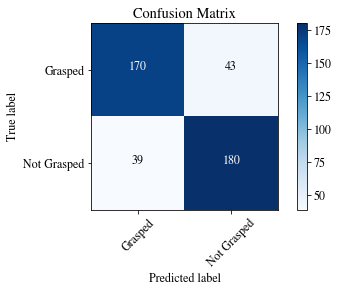

In [18]:
valLabels = validateBatch.classes
predictions = model.predict_generator(validateBatch, steps= len(valLabels)//batchSize+1)
cm = confusion_matrix(valLabels, predictions.argmax(axis=1))
cmPlotLabels = ['Grasped', 'Not Grasped']
plot_confusion_matrix(cm, cmPlotLabels, title='Confusion Matrix')

In [12]:
# save models
model.save('mobilenets.h5')
converter = tf.lite.TFLiteConverter.from_keras_model_file('mobilenets.h5')
tflite_model = converter.convert()
open("mobilenets.tflite", "wb").write(tflite_model)

W1116 19:48:23.205561 139896598071040 deprecation.py:506] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1116 19:48:29.372079 139896598071040 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/lite/python/util.py:238: convert_variables_to_constants (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
W1116 19:48:29.374042 139896598071040 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/graph_util_impl.py:270: extract_sub_graph (from tensorflow.python.framework.graph_util_impl) is deprecated and

3268256